In [1]:
%run helper

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from collections import Counter
import random
import re
import gc
import matplotlib.pyplot as plt
import nltk

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',
                      stopwords=[], collocations=False,
                      max_words=200, max_font_size=40, scale=3,
                      random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [5]:
# read data from xml file
tree = ET.parse('ted_en-20160408.xml')
root = tree.getroot()
# get all content
all_transcript = [root[i][1].text for i in range(len(root))]

In [6]:
clean_transcript = [clean1(transcript).lower() for transcript in all_transcript]

In [143]:
print("Example of transcript before cleaning:")
print(all_transcript[0][:300])
print()
print("Example of transcript after cleaning:")
print(clean_transcript[0][:300])

Example of transcript before cleaning:
Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit

Example of transcript after cleaning:
here are two reasons companies fail they only do more of the same or they only do what s new to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation both are necessary but it can be too much of a good thing consider facit i m act


In [7]:
transcripts = [transcript.split() for transcript in clean_transcript]

In [24]:
corpus = " ".join(clean_transcript)

In [25]:
len(corpus.split())

4492489

In [26]:
len(set(corpus.split()))

63918

In [27]:
lengths = [len(transcript) for transcript in transcripts]

In [28]:
lengths = pd.DataFrame(lengths)

In [29]:
lengths.head()

,0
0,1374
1,1917
2,2178
3,1216
4,2647


In [30]:
color = cm.autumn(np.linspace(.4,.8, 30))

Text(0.5,0,'word counts')

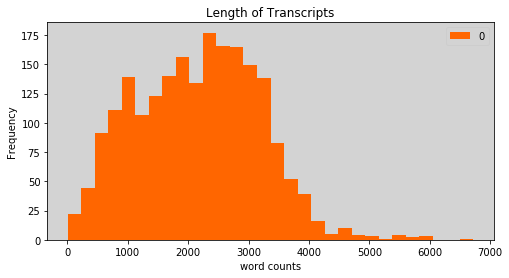

In [32]:
lengths.plot.hist(bins = 30, color = color, figsize = (8, 4))
plt.title("Length of Transcripts")
plt.xlabel("word counts")

In [14]:
lengths.describe()

,0
count,2085.000000
mean,2154.670983
std,1019.252885
min,2.000000
25%,1358.000000
50%,2199.000000
75%,2896.000000
max,6724.000000


In [8]:
# split data to training, validation and testing
train = clean_transcript[:1585]
valid = clean_transcript[1585:1835]
test = clean_transcript[1835:]

In [9]:
# join all transcript together to one corpus
train_corpus = " ".join(train)
valid_corpus = " ".join(valid)
test_corpus = " ".join(test)

In [32]:
#n_seq = 51
#train_seq = create_input_output(transcript=train_corpus, n_seq=n_seq)
#valid_seq = create_input_output(transcript=valid_corpus, n_seq=n_seq)
#train_seq_in = list(map(lambda seq: seq.split()[:-1], train_seq))
#train_seq_out = list(map(lambda seq: seq.split()[-1], train_seq))
#valid_seq_in = list(map(lambda seq: seq.split()[:-1], valid_seq))
#valid_seq_out = list(map(lambda seq: seq.split()[-1], valid_seq))
#train_seq_out_count = Counter(train_seq_out)
#train_seq_out_count.most_common()

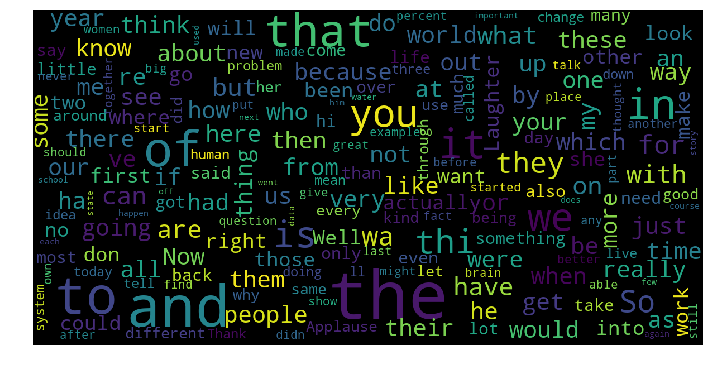

In [116]:
show_wordcloud(train_corpus)

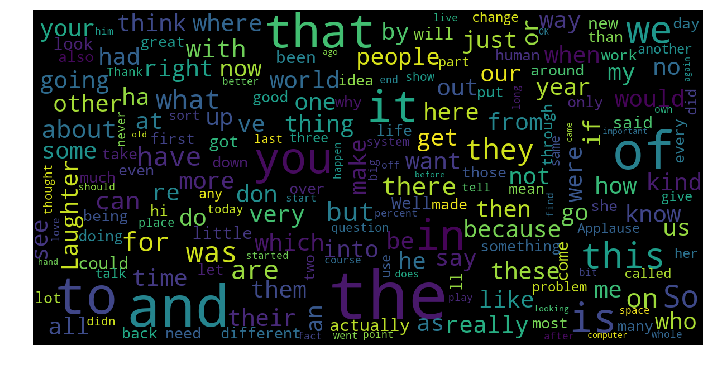

In [117]:
show_wordcloud(valid_corpus)

### Explore most common ngrams
Since the models are repeatedly predicting the same phases, it is hypothesis that the corpus is dominated by those phases.
We will see if this is true by checking the most common n_grams in the corpus

In [10]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,.8, 30))
#color

In [11]:
color = cm.autumn(np.linspace(.4,.8, 30))
plt.rcParams['axes.facecolor'] = 'lightgrey'

In [12]:
def most_common_plot(word_counter, n_words, title):
    lst = word_counter.most_common(n_words)
    df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    df.sort_values(["Count"], ascending=True, inplace=True)
    df.plot(x='Word',y='Count', figsize = (10, 8), color=color, kind="barh")
    plt.title(title)

In [13]:
def ngram_freq(train_corpus, valid_corpus, test_corpus, n_gram, n_words):
    train_n_gram = list(nltk.ngrams(train_corpus.lower().split(), n_gram))
    valid_n_gram = list(nltk.ngrams(valid_corpus.lower().split(), n_gram))
    test_n_gram = list(nltk.ngrams(test_corpus.lower().split(), n_gram))
    
    train_counter = Counter(train_n_gram)
    valid_counter = Counter(valid_n_gram)
    test_counter = Counter(test_n_gram)
    
    most_common_plot(train_counter, n_words, "Most Common Train " + str(n_gram) + " grams")
    most_common_plot(valid_counter, n_words, "Most Common Valid " + str(n_gram) + " grams")
    most_common_plot(test_counter, n_words, "Most Common Test " + str(n_gram) + " grams")
    
    return train_counter, valid_counter, test_counter

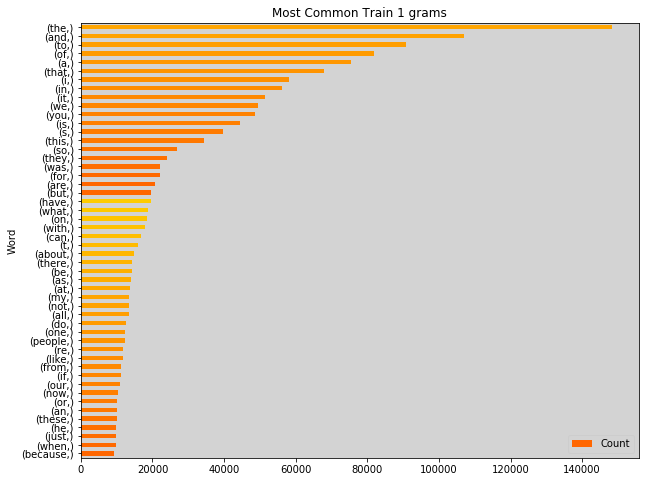

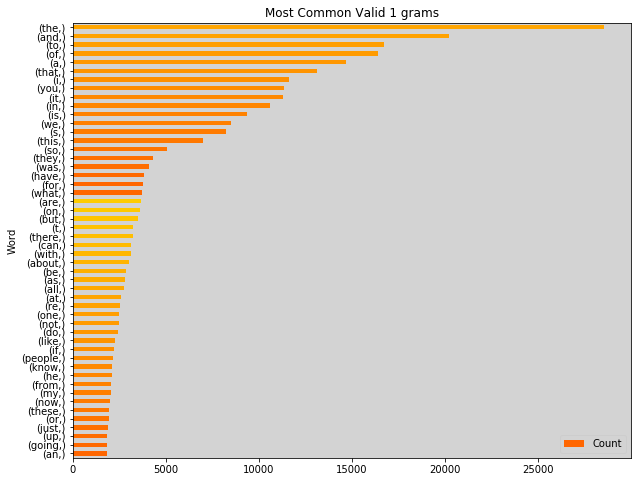

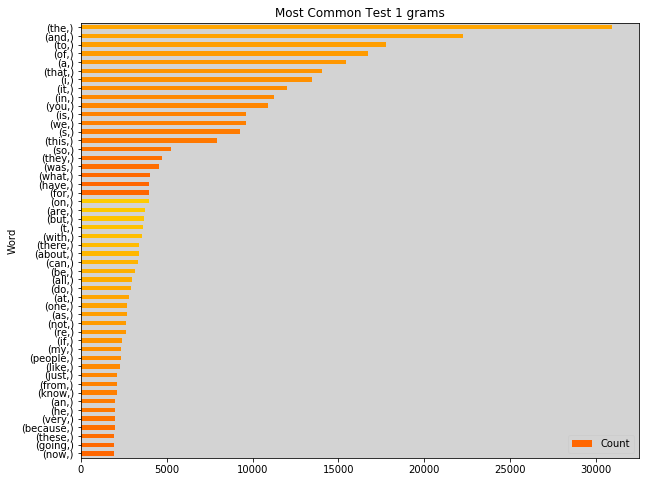

In [127]:
train_counter, valid_counter, test_counter = ngram_freq(train_corpus, valid_corpus, test_corpus, 1, 50)

In [51]:
train_counter[('the',)]*100/sum(train_counter.values())

4.600253482596086

In [118]:
#train_counter.most_common(10), valid_counter.most_common(10), test_counter.most_common(10)

In [56]:
#ngram_freq(train_corpus, valid_corpus, test_corpus, 2, 50)

(Counter({('here', 'are', 'two'): 12,
          ('are', 'two', 'reasons'): 3,
          ('two', 'reasons', 'companies'): 1,
          ('reasons', 'companies', 'fail'): 1,
          ('companies', 'fail', 'they'): 1,
          ('fail', 'they', 'only'): 1,
          ('they', 'only', 'do'): 2,
          ('only', 'do', 'more'): 1,
          ('do', 'more', 'of'): 9,
          ('more', 'of', 'the'): 22,
          ('of', 'the', 'same'): 88,
          ('the', 'same', 'or'): 6,
          ('same', 'or', 'they'): 1,
          ('or', 'they', 'only'): 1,
          ('only', 'do', 'what'): 1,
          ('do', 'what', 's'): 5,
          ('what', 's', 'new'): 6,
          ('s', 'new', 'to'): 1,
          ('new', 'to', 'me'): 2,
          ('to', 'me', 'the'): 35,
          ('me', 'the', 'real'): 2,
          ('the', 'real', 'real'): 1,
          ('real', 'real', 'solution'): 1,
          ('real', 'solution', 'to'): 1,
          ('solution', 'to', 'quality'): 1,
          ('to', 'quality', 'growth'): 1,
 

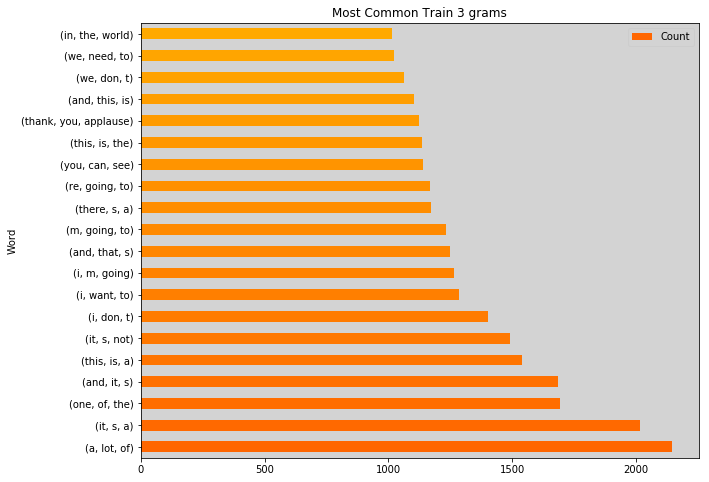

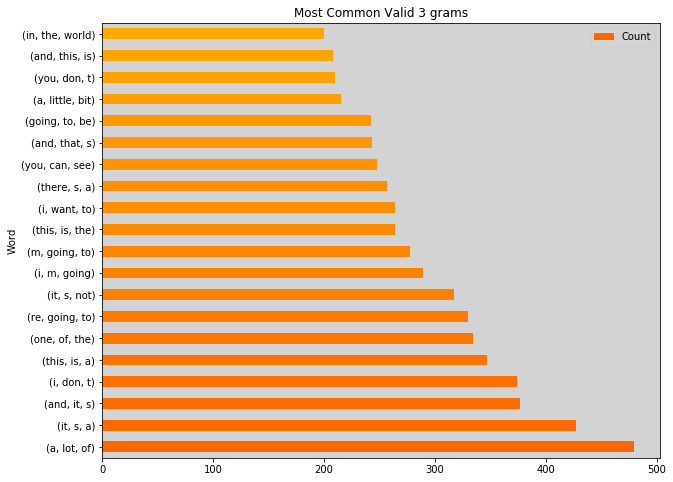

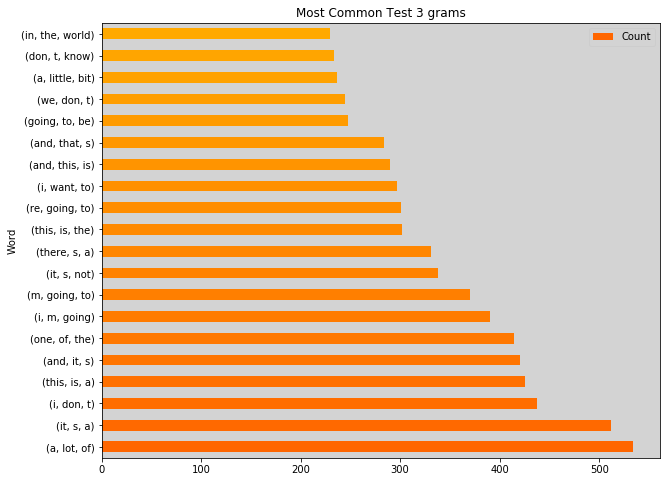

In [119]:
ngram_freq(train_corpus, valid_corpus, test_corpus, 3, 20)

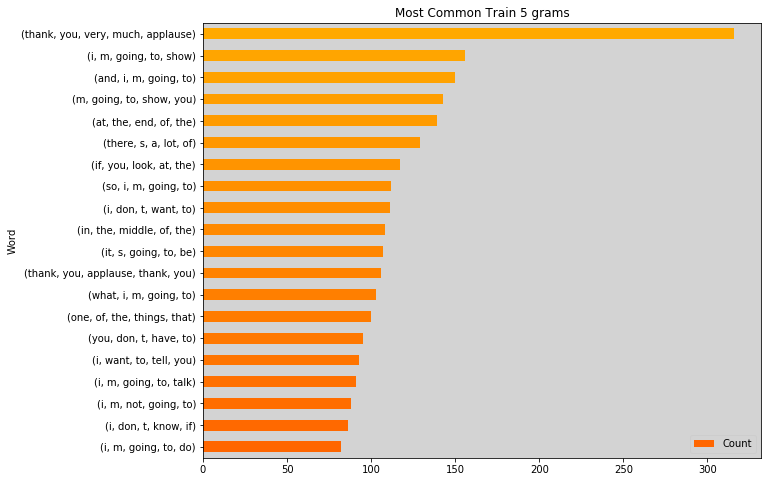

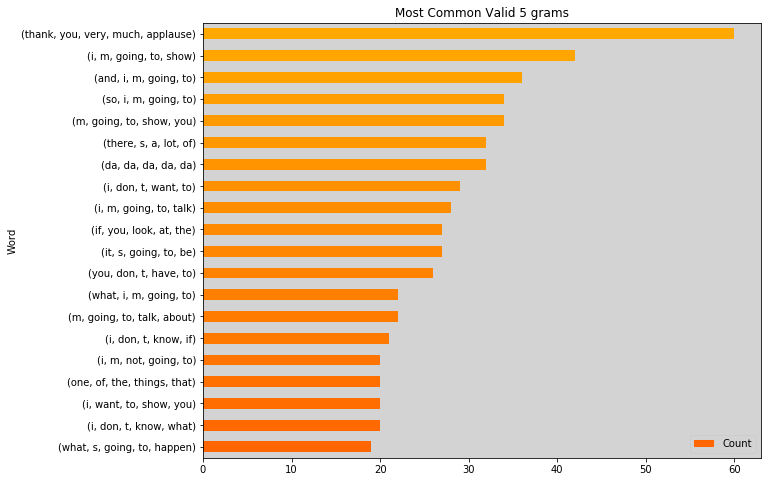

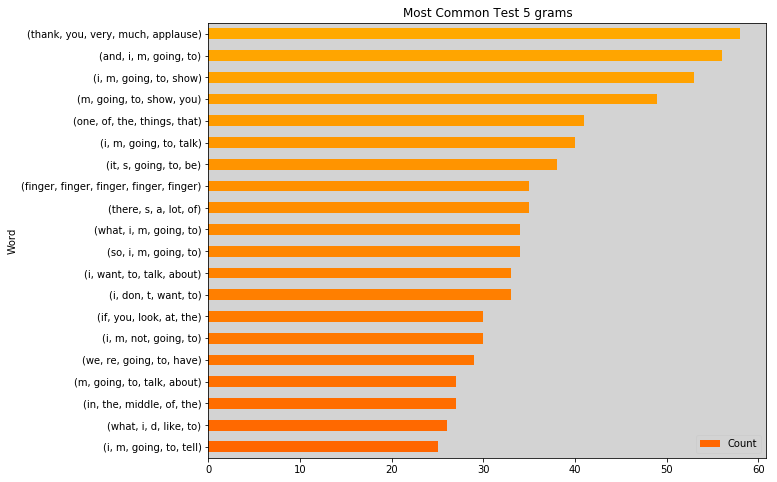

In [14]:
train_5grams, valdid_5grams, test_5grams = ngram_freq(train_corpus, valid_corpus, test_corpus, 5, 20)

In [15]:
def train_test_ngrams(train_ngram_counter, test_ngram_counter, n_words):
    
    train_total = sum(train_ngram_counter.values())
    test_total = sum(test_ngram_counter.values())
    
    train_most_common = pd.DataFrame(train_ngram_counter.most_common(n_words), columns=["n_grams", "train_count"])
    train_most_common["train_count_per"] = [round(count*100/train_total, 4) for count in train_most_common["train_count"]]
    
    train_most_common["test_count"] = [test_ngram_counter[ngram] for ngram in train_most_common["n_grams"]]
    train_most_common["test_count_per"] = [round(count*100/test_total, 4) for count in train_most_common["test_count"]]
    
    train_most_common.sort_values(["train_count"], ascending=True, inplace=True)
    
    #print(train_most_common)
    fig, ax = plt.subplots(figsize = (10,8))
    index = np.arange(n_words)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.barh(index, train_most_common["train_count_per"], bar_width,
                 alpha=opacity,
                 label='Train count per')

    rects2 = plt.barh(index + bar_width, train_most_common["test_count_per"], bar_width,
                 alpha=opacity, 
                 label='Test count per')
    plt.ylabel('n_gram')
    plt.xlabel('Count percentage')
    plt.title('N-grams in text')
    plt.yticks(index + bar_width, train_most_common["n_grams"])
    plt.legend()
    plt.show()
    
    return train_most_common

                               n_grams  train_count  train_count_per  \
19               (i, m, going, to, do)           82           0.0025   
18               (i, don, t, know, if)           86           0.0027   
17              (i, m, not, going, to)           88           0.0027   
16             (i, m, going, to, talk)           91           0.0028   
15            (i, want, to, tell, you)           93           0.0029   
14             (you, don, t, have, to)           95           0.0029   
13        (one, of, the, things, that)          100           0.0031   
12             (what, i, m, going, to)          103           0.0032   
11  (thank, you, applause, thank, you)          106           0.0033   
10              (it, s, going, to, be)          107           0.0033   
9           (in, the, middle, of, the)          108           0.0033   
8                (i, don, t, want, to)          111           0.0034   
7                (so, i, m, going, to)          112           0.

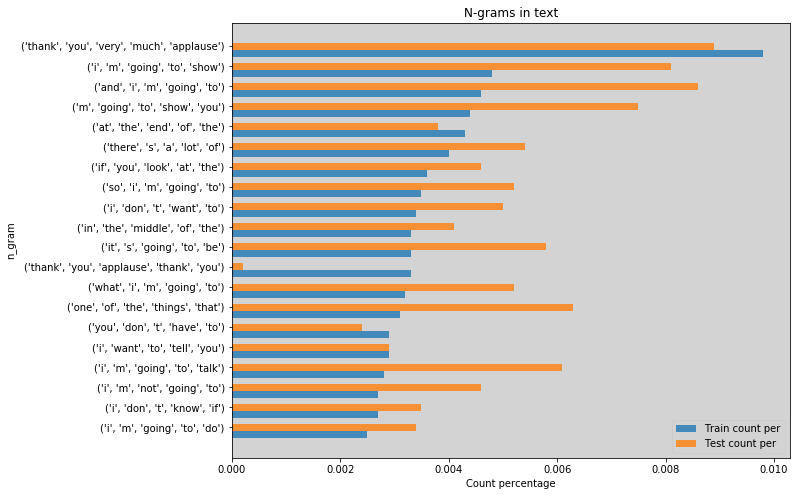

In [130]:
train_test_5grams = train_test_ngrams(train_5grams, test_5grams, 20)

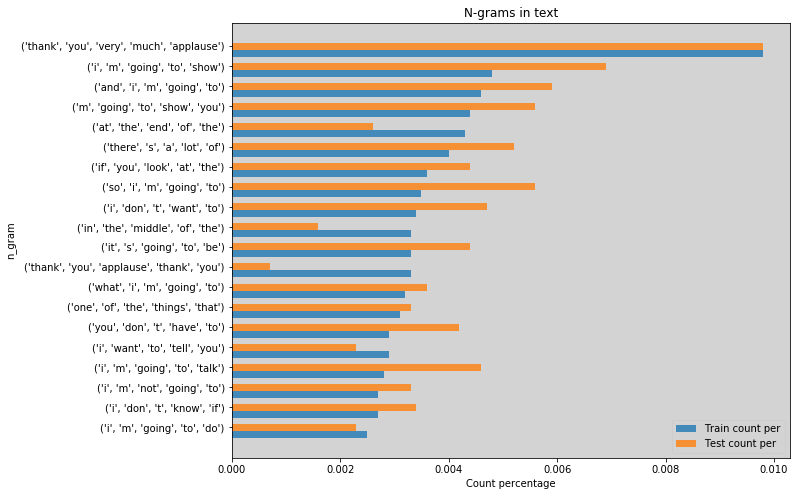

In [17]:
train_valid_5grams = train_test_ngrams(train_5grams, valdid_5grams, 20)

### Examine the number of unknowns in corpus vs vocab size
When training with a small vocab size (1000), all the models output UNK when asked to generate new text. It is hypothezied that when the vocab size is samll, the corpus is dominted by unknown words ("UNK"), and hence the models only learns to predict UNK. It is most ideal if we could use all vocabularies, but that will mean a bigger model, and longer training time. To balance this, we are going to examine the ratio between UNK and vocab size, and select a vocab size that gives a good balance.

In [133]:
from keras.preprocessing.text import Tokenizer

C:\Users\V Chan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [68]:
tokenizer = unpickle_object("tokenizer_1000.pkl")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [134]:
def UNK_vs_VocabSize(corpus, vocab_size):
    print("Vocab size = ", vocab_size)
    tokenizer = Tokenizer(oov_token="UNK", num_words=vocab_size+1)
    # fit tokenizer on training text
    tokenizer.fit_on_texts([corpus])
    # modify word_index so that all vocabs not found is assigned "UNK" token
    tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= vocab_size} # <= because tokenizer is 1 indexed
    tokenizer.word_index[tokenizer.oov_token] = vocab_size + 1
    
    oov_index = len(tokenizer.word_index)
    print("OOV index = ", oov_index)
    corpus_encoded = tokenizer.texts_to_sequences(corpus.split())
    corpus_encoded = [item for items in corpus_encoded for item in items]
    
    encoded_counter = Counter(corpus_encoded)
    per = encoded_counter[oov_index]*100/len(corpus_encoded)
    print("% of UNK in corpus = ", round(per, 2))
    most_common_plot(encoded_counter, 50, "UNK in corpus, vocab size = " + str(vocab_size))

Vocab size =  1000
OOV index =  1001
% of UNK in corpus =  19.64


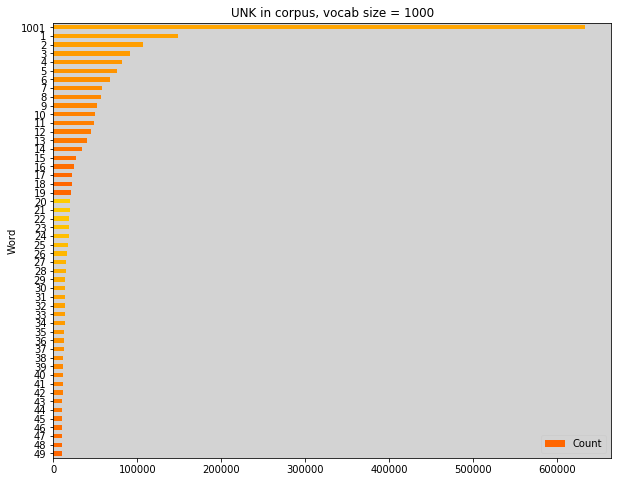

In [135]:
UNK_vs_VocabSize(train_corpus, 1000)

Vocab size =  5000
OOV index =  5001
% of UNK in corpus =  7.16


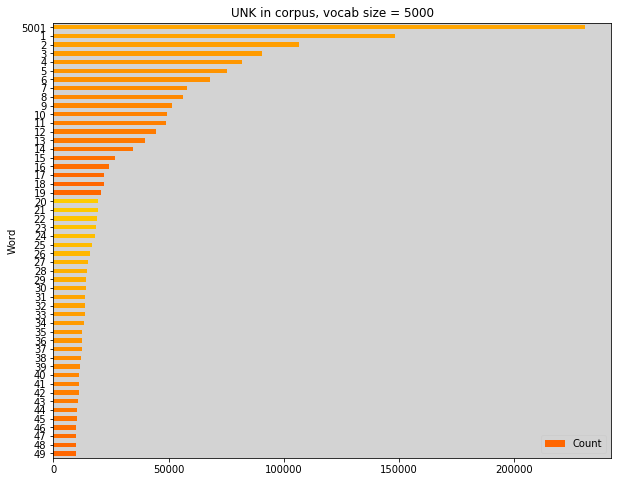

In [136]:
UNK_vs_VocabSize(train_corpus, 5000)

Vocab size =  10000
OOV index =  10001
% of UNK in corpus =  3.61


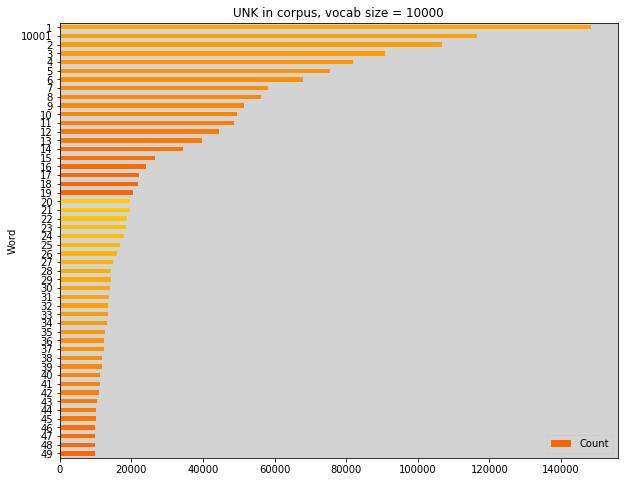

In [137]:
UNK_vs_VocabSize(train_corpus, 10000)

Vocab size =  20000
OOV index =  20001
% of UNK in corpus =  1.38


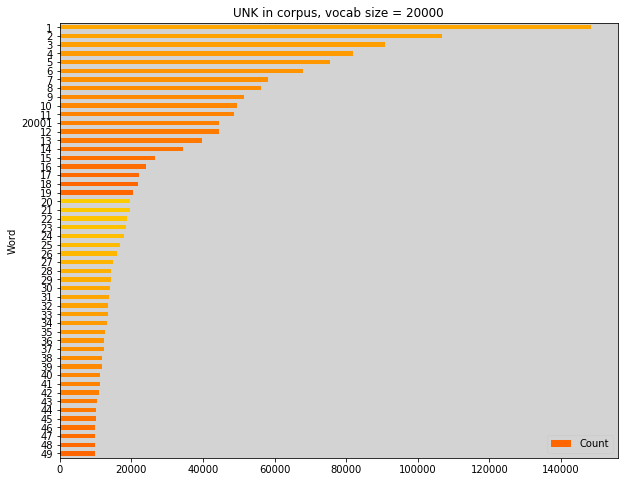

In [138]:
UNK_vs_VocabSize(train_corpus, 20000)

In [171]:
UNK_count = {"vocab_size": [1000, 5000, 10000, 20000],
            "UNK": [19.64, 7.16, 3.61, 1.38]}
df = pd.DataFrame(data = UNK_count, columns=['vocab_size', 'UNK'])

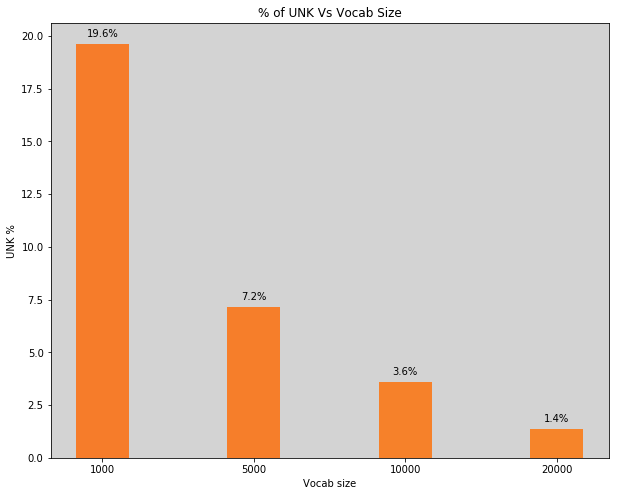

In [189]:
fig, ax = plt.subplots(figsize = (10,8))
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df["UNK"], bar_width,
                 alpha=opacity, color = color)    
plt.ylabel('UNK %')
plt.xlabel('Vocab size')
plt.title('% of UNK Vs Vocab Size')
plt.xticks(index, df["vocab_size"])

for rect in rects1:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
plt.show()

In [194]:
"finger" in "I have a finger".split()

True

In [202]:
finger = [transcript for transcript in test if "finger" in transcript.split()]

In [203]:
finger

['My work is about the behaviors that we all engage in unconsciously on a collective level And what I mean by that it s the behaviors that we re in denial about and the ones that operate below the surface of our daily awareness And as individuals we all do these things all the time everyday It s like when you re mean to your wife because you re mad at somebody else Or when you drink a little too much at a party just out of anxiety Or when you overeat because your feelings are hurt or whatever And when we do these kind of things when 300 million people do unconscious behaviors then it can add up to a catastrophic consequence that nobody wants and no one intended And that s what I look at with my photographic work This is an image I just recently completed that is when you stand back at a distance it looks like some kind of neo Gothic cartoon image of a factory spewing out pollution And as you get a little bit closer it starts looking like lots of pipes like maybe a chemical plant or a r